## 바벨스피치 Part3 - 1회차 스터디 안내

- [바벨스피치 스터디 github 주소](https://github.com/KaggleBreak/babelspeech)
- [바벨스피치 스터디 자료 보관 구글드라이브 주소](https://drive.google.com/drive/folders/0B2l0iH28o85xRG5KSHM3QlpiRjg)
- [바벨스피치 스터디 스케줄](https://docs.google.com/spreadsheets/d/1vO5M5ygTE9P0TAMSpgR3Aw4Y_tO4l59ZzOqbcNKyphs/edit?usp=drive_web)
- [바벨피쉬 페이스북](https://www.facebook.com/groups/babelPish/)
- [캐글뽀개기 페이스북](https://www.facebook.com/groups/kagglebreak)


## Generative Model 

#### [GANs Udacity](https://www.nodalpoint.com/gans-udacity/)
#### [GANs 논문모음](https://github.com/wiseodd/generative-models)
#### [GANs 케라스 실습](https://github.com/eriklindernoren/Keras-GAN)
#### [GANs and Variational Autoencoders Udemy](https://www.udemy.com/deep-learning-gans-and-variational-autoencoders/)


## 2-1. Generative Modeling Review

### 2-2. What does it mean to Sample?

[Udemy Github](https://github.com/lazyprogrammer/machine_learning_examples/tree/master/unsupervised_class3)

[Data1](https://www.kaggle.com/c/digit-recognizer/data)
[Data2](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

![](./img/img2_1.png)

![](./img/img2_2.png)

![](./img/img2_3.png)

![](./img/img2_4.png)

![](./img/img2_5.png)

In [30]:
# https://deeplearningcourses.com/c/deep-learning-gans-and-variational-autoencoders
# https://www.udemy.com/deep-learning-gans-and-variational-autoencoders
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import util
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

import os
import requests
import zipfile
import numpy as np
import pandas as pd
from scipy.misc import imread, imsave, imresize
from glob import glob
from tqdm import tqdm

%matplotlib inline

In [36]:
def get_mnist(limit=None):
  if not os.path.exists('./large_files'):
    print("You must create a folder called large_files adjacent to the class folder first.")
  if not os.path.exists('./large_files/train.csv'):
    print("Looks like you haven't downloaded the data or it's not in the right spot.")
    print("Please get train.csv from https://www.kaggle.com/c/digit-recognizer")
    print("and place it in the large_files folder.")

  print("Reading in and transforming data...")
  df = pd.read_csv('./large_files/train.csv')
  data = df.as_matrix()
  np.random.shuffle(data)
  X = data[:, 1:] / 255.0 # data is from 0..255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y

In [46]:
class BayesClassifier:
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))

    self.gaussians = []
    self.p_y = np.zeros(self.K)
    for k in range(self.K):
      Xk = X[Y == k]
      self.p_y[k] = len(Xk)
      mean = Xk.mean(axis=0)
      cov = np.cov(Xk.T)
      g = {'m': mean, 'c': cov}
      self.gaussians.append(g)
    # normalize p(y)
    self.p_y /= self.p_y.sum()

  def sample_given_y(self, y):
    g = self.gaussians[y]
    return mvn.rvs(mean=g['m'], cov=g['c'])

  def sample(self):
    y = np.random.choice(self.K, p=self.p_y)
    return self.sample_given_y(y)

Reading in and transforming data...


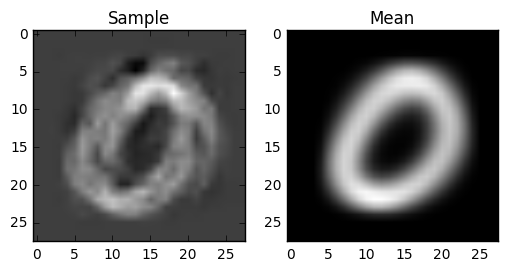

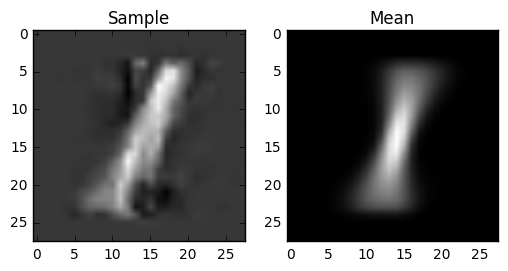

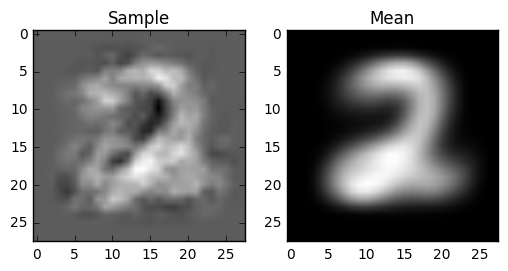

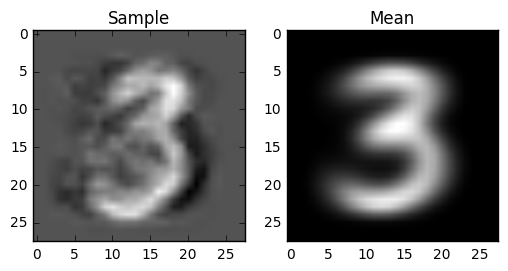

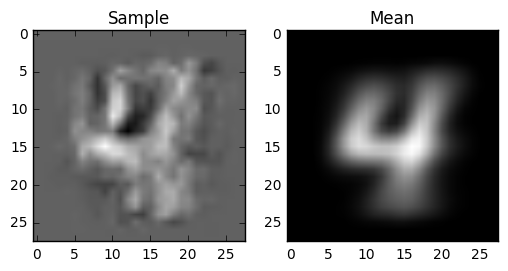

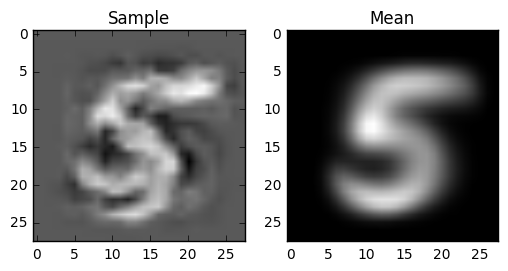

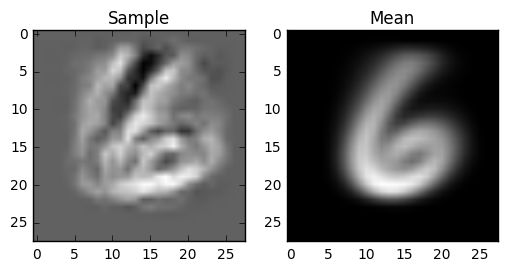

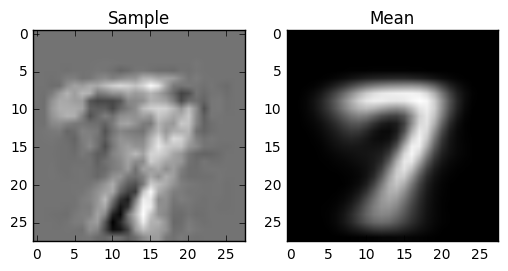

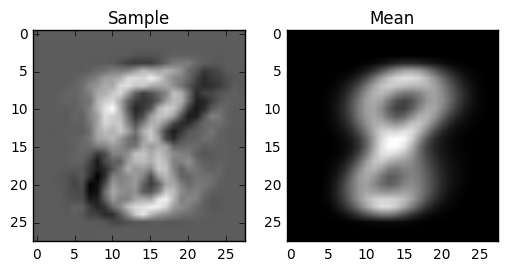

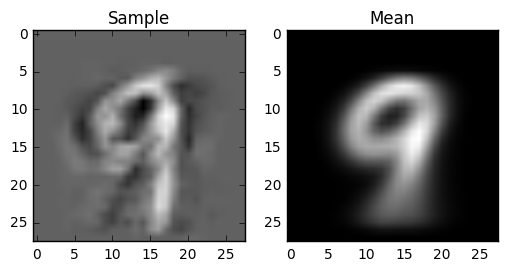

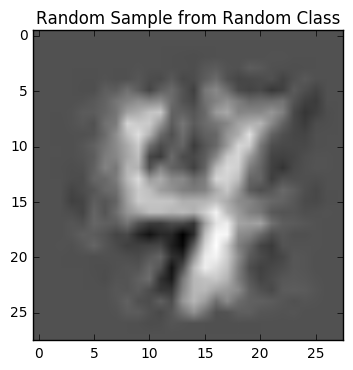

In [47]:
if __name__ == '__main__':
  X, Y = get_mnist()
  clf = BayesClassifier()
  clf.fit(X, Y)

  for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned

    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

  # generate a random sample
  sample = clf.sample().reshape(28, 28)
  plt.imshow(sample, cmap='gray')
  plt.title("Random Sample from Random Class")
  plt.show()

### 2-3. Gaussian Mixture Model Review

![](./img/img2_6.png)

![](./img/img2_7.png)

![](./img/img2_8.png)

![](./img/img2_9.png)

![](./img/img2_10.png)

![](./img/img2_11.png)

![](./img/img2_12.png)

![](./img/img2_13.png)

![](./img/img2_14.png)

![](./img/img2_15.png)

![](./img/img2_16.png)

![](./img/img2_17.png)

![](./img/img2_18.png)

In [38]:
from sklearn.mixture import BayesianGaussianMixture

class BayesClassifier:
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))

    self.gaussians = []
    self.p_y = np.zeros(self.K)
    for k in range(self.K):
      print("Fitting gmm", k)
      Xk = X[Y == k]
      self.p_y[k] = len(Xk)
      gmm = BayesianGaussianMixture(10)
      gmm.fit(Xk)
      self.gaussians.append(gmm)
    # normalize p(y)
    self.p_y /= self.p_y.sum()

  def sample_given_y(self, y):
    gmm = self.gaussians[y]
    sample = gmm.sample()
    # note: sample returns a tuple containing 2 things:
    # 1) the sample
    # 2) which cluster it came from
    # we'll use (2) to obtain the means so we can plot
    # them like we did in the previous script
    # we cheat by looking at "non-public" params in
    # the sklearn source code
    mean = gmm.means_[sample[1]]
    return sample[0].reshape(28, 28), mean.reshape(28, 28)

  def sample(self):
    y = np.random.choice(self.K, p=self.p_y)
    return self.sample_given_y(y)

Reading in and transforming data...
Fitting gmm 0
Fitting gmm 1
Fitting gmm 2
Fitting gmm 3
Fitting gmm 4
Fitting gmm 5
Fitting gmm 6
Fitting gmm 7
Fitting gmm 8
Fitting gmm 9


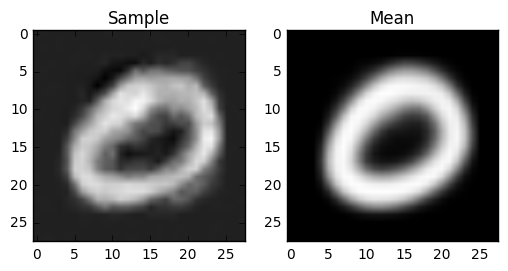

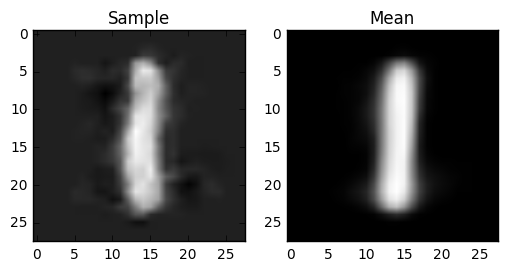

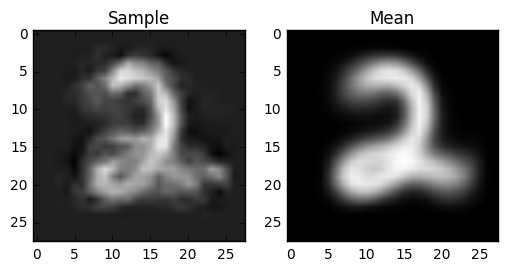

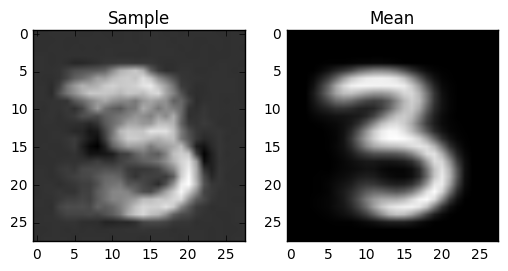

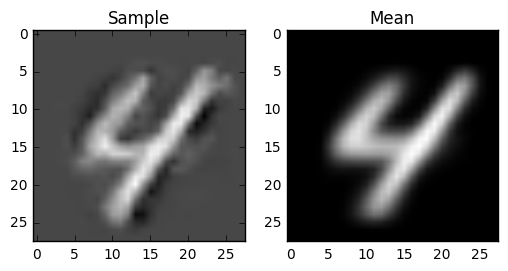

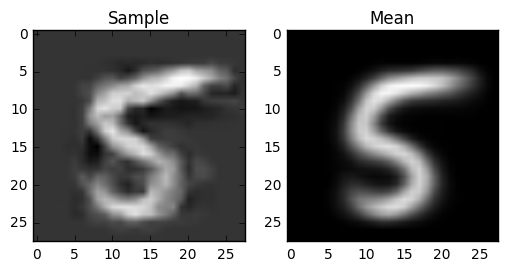

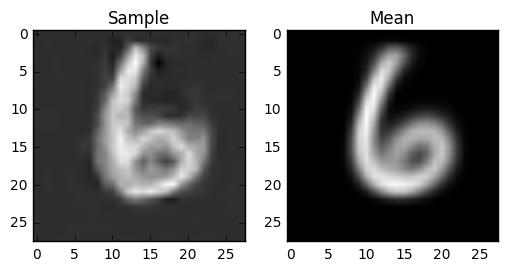

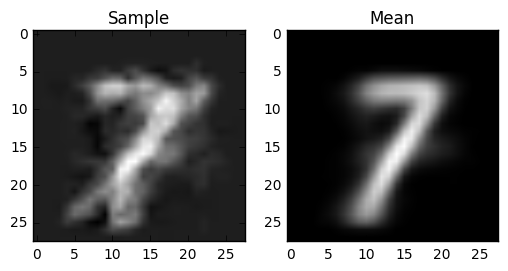

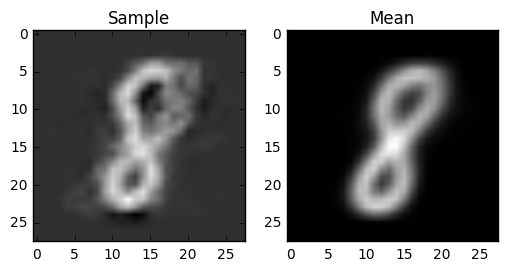

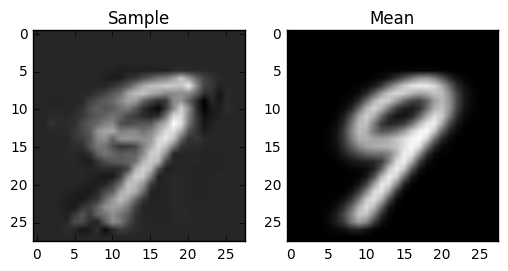

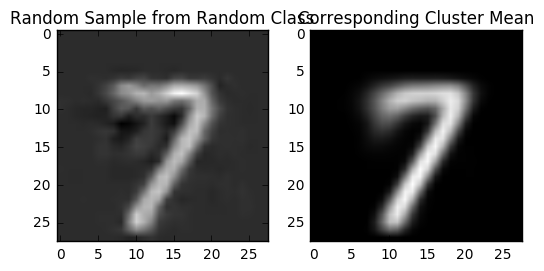

In [40]:
if __name__ == '__main__':
  X, Y = get_mnist()
  clf = BayesClassifier()
  clf.fit(X, Y)

  for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned

    sample, mean = clf.sample_given_y(k)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

  # generate a random sample
  sample, mean = clf.sample()
  plt.subplot(1,2,1)
  plt.imshow(sample, cmap='gray')
  plt.title("Random Sample from Random Class")
  plt.subplot(1,2,2)
  plt.imshow(mean, cmap='gray')
  plt.title("Corresponding Cluster Mean")
  plt.show()

### 2-4 Why do we care about generating samples?

![](./img/img2_19.png)
![](./img/img2_20.png)
![](./img/img2_21.png)
![](./img/img2_22.png)
![](./img/img2_23.png)
![](./img/img2_24.png)
![](./img/img2_25.png)
![](./img/img2_26.png)
![](./img/img2_27.png)
![](./img/img2_28.png)
![](./img/img2_29.png)
![](./img/img2_30.png)
![](./img/img2_31.png)
![](./img/img2_32.png)
![](./img/img2_33.png)
![](./img/img2_34.png)
![](./img/img2_35.png)


### 2-5 Neural Network and Autoencoder Review

![](./img/img2_36.png)
![](./img/img2_37.png)
![](./img/img2_38.png)
![](./img/img2_39.png)
![](./img/img2_40.png)
![](./img/img2_41.png)
![](./img/img2_42.png)
![](./img/img2_43.png)

In [41]:
import tensorflow as tf

In [50]:
class Autoencoder:
  def __init__(self, D, M):
    # represents a batch of training data
    self.X = tf.placeholder(tf.float32, shape=(None, D))

    # input -> hidden
    self.W = tf.Variable(tf.random_normal(shape=(D, M)) * np.sqrt(2.0 / M))
    self.b = tf.Variable(np.zeros(M).astype(np.float32))

    # hidden -> output
    self.V = tf.Variable(tf.random_normal(shape=(M, D)) * np.sqrt(2.0 / D))
    self.c = tf.Variable(np.zeros(D).astype(np.float32))

    # construct the reconstruction
    self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b)
    logits = tf.matmul(self.Z, self.V) + self.c
    self.X_hat = tf.nn.sigmoid(logits)

    # compute the cost
    self.cost = tf.reduce_sum(
      tf.nn.sigmoid_cross_entropy_with_logits(
        labels=self.X,
        logits=logits
      )
    )

    # make the trainer
    self.train_op = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(self.cost)

    # set up session and variables for later
    self.init_op = tf.global_variables_initializer()
    self.sess = tf.InteractiveSession()
    self.sess.run(self.init_op)

  def fit(self, X, epochs=30, batch_sz=64):
    costs = []
    n_batches = len(X) // batch_sz
    print("n_batches:", n_batches)
    for i in range(epochs):
      print("epoch:", i)
      np.random.shuffle(X)
      for j in range(n_batches):
        batch = X[j*batch_sz:(j+1)*batch_sz]
        _, c, = self.sess.run((self.train_op, self.cost), feed_dict={self.X: batch})
        c /= batch_sz # just debugging
        costs.append(c)
        if j % 100 == 0:
          print("iter: %d, cost: %.3f" % (j, c))
    plt.plot(costs)
    plt.show()

  def predict(self, X):
    return self.sess.run(self.X_hat, feed_dict={self.X: X})



Reading in and transforming data...
n_batches: 656
epoch: 0
iter: 0, cost: 572.707
iter: 100, cost: 111.898
iter: 200, cost: 86.332
iter: 300, cost: 78.263
iter: 400, cost: 74.366
iter: 500, cost: 69.889
iter: 600, cost: 66.762
epoch: 1
iter: 0, cost: 66.864
iter: 100, cost: 65.551
iter: 200, cost: 58.982
iter: 300, cost: 57.422
iter: 400, cost: 58.250
iter: 500, cost: 59.116
iter: 600, cost: 61.042
epoch: 2
iter: 0, cost: 57.901
iter: 100, cost: 56.193
iter: 200, cost: 55.190
iter: 300, cost: 59.284
iter: 400, cost: 56.102
iter: 500, cost: 55.629
iter: 600, cost: 57.213
epoch: 3
iter: 0, cost: 57.389
iter: 100, cost: 54.845
iter: 200, cost: 57.668
iter: 300, cost: 58.030
iter: 400, cost: 54.196
iter: 500, cost: 56.517
iter: 600, cost: 54.813
epoch: 4
iter: 0, cost: 55.305
iter: 100, cost: 56.067
iter: 200, cost: 56.000
iter: 300, cost: 53.704
iter: 400, cost: 54.564
iter: 500, cost: 51.936
iter: 600, cost: 50.537
epoch: 5
iter: 0, cost: 53.092
iter: 100, cost: 52.501
iter: 200, cost: 

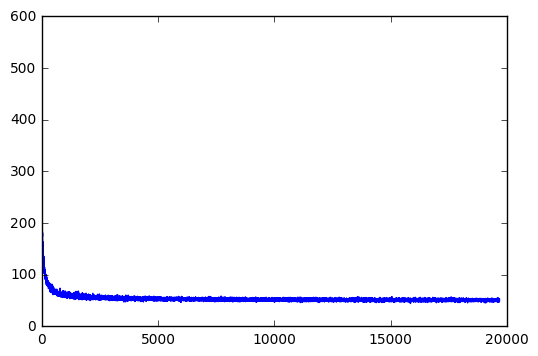

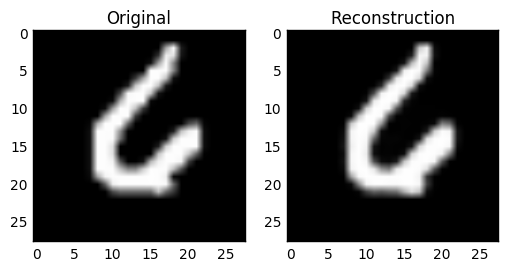

Generate another?6


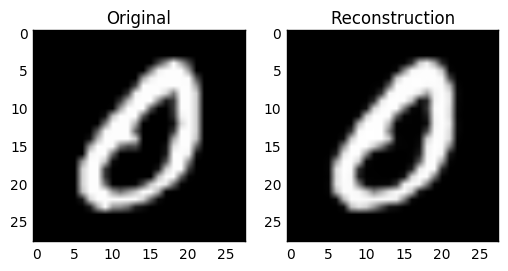

Generate another?0


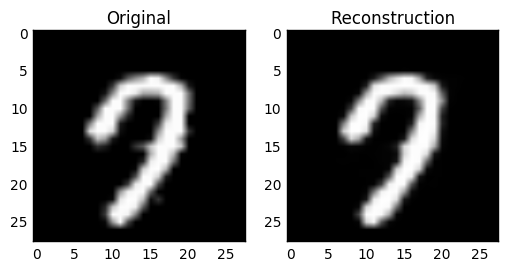

Generate another?7


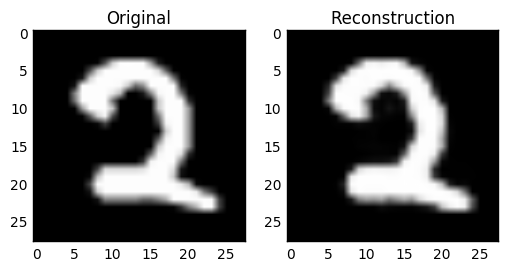

Generate another?ㅏ


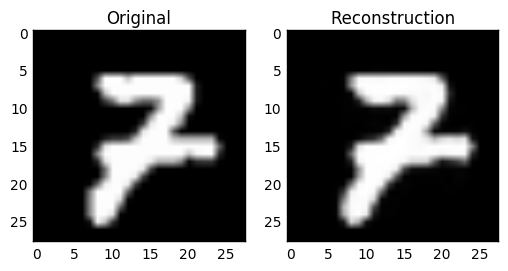

Generate another?7


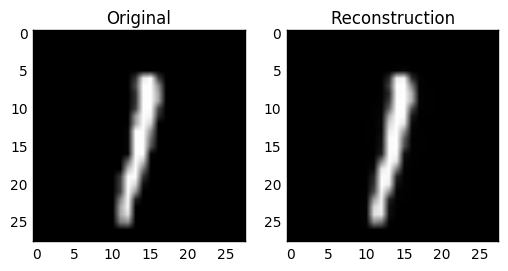

Generate another?1\


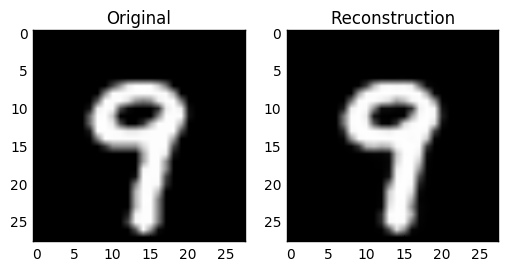

Generate another?9


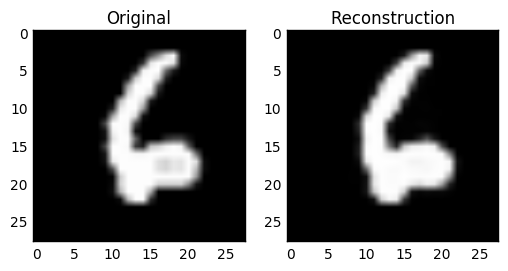

Generate another?0


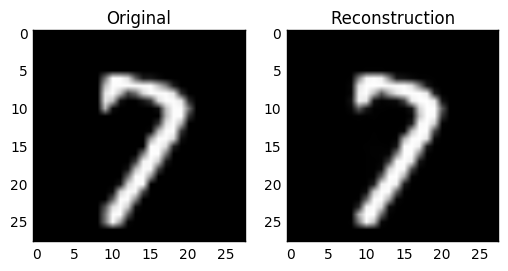

Generate another?k


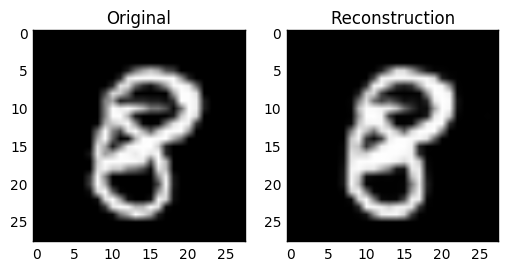

In [ ]:
def main():
  X, Y = get_mnist()

  model = Autoencoder(784, 300)
  model.fit(X)

  # plot reconstruction
  done = False
  while not done:
    i = np.random.choice(len(X))
    x = X[i]
    im = model.predict([x]).reshape(28, 28)
    plt.subplot(1,2,1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.subplot(1,2,2)
    plt.imshow(im, cmap='gray')
    plt.title("Reconstruction")
    plt.show()

    ans = input("Generate another?")
    if ans and ans[0] in ('n' or 'N'):
      done = True

if __name__ == '__main__':
  main()